# Dates and times in pandas

Pandas can handle dates and times thanks to specific data types.

It has objects for points in time as well as periods of time with methods and attributes that reflect time related details

Sequences of dates and periods can be found as:
- series
- dataframe columns
- indexes

# Timestamp, Period, Frequency, date_range

In [33]:
import pandas as pd 
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

time_stamp = pd.Timestamp(datetime(2024,1,1))
pd.Timestamp('2024-01-01') == time_stamp

True

In [34]:
type(time_stamp)

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
time_stamp

Timestamp('2024-01-01 00:00:00')

In [36]:
time_stamp.year

2024

In [37]:
time_stamp.month

1

In [38]:
time_stamp.day_of_week

0

In [39]:
period = pd.Period('2024-01')
period

Period('2024-01', 'M')

In [40]:
period.asfreq('D')

Period('2024-01-31', 'D')

In [41]:
period.to_timestamp()

Timestamp('2024-01-01 00:00:00')

In [42]:
period.to_timestamp().to_period('M')

Period('2024-01', 'M')

In [43]:
period + 2

Period('2024-03', 'M')

In [44]:
index = pd.date_range(start='2017-1-1', periods=12, freq='ME')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [45]:
index[0]

Timestamp('2017-01-31 00:00:00')

In [46]:
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

There are many frequency aliases besides 'ME' and 'D':

| Period   | Alias |
|----------|-------|
| Hour     | H     |
| Day      | D     |
| Week     | W     |
| Month    | ME    |
| Quarter  | Q     |
| Year     | A     |

These may be further differentiated by beginning/end of period, or business-specific definition.

You can also access these `pd.Timestamp()` attributes:

| attribute                            |
|--------------------------------------|
| .second, .minute, .hour              |
| .day, .month, .quarter, .year        |
| .weekday                             |
| dayofweek                            |
| .weekofyear                          |
| .dayofyear                           |

In [47]:
# Parsing strings into datetime

In [48]:
google = pd.read_csv('../data/stock_data/google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [49]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [50]:
google['Date'] = pd.to_datetime(google['Date'])

In [51]:
google.set_index('Date', inplace=True)

In [52]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


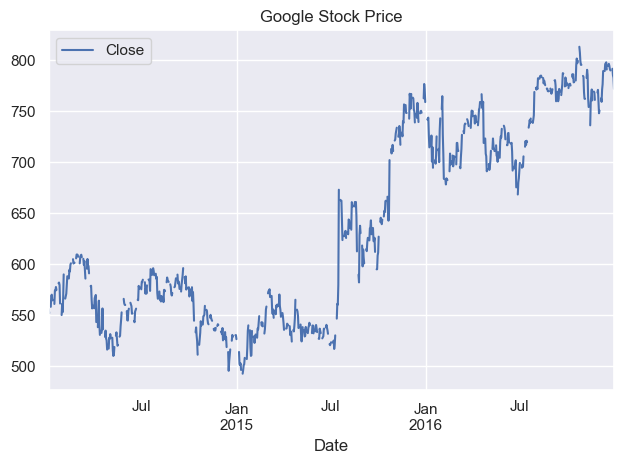

In [53]:
sns.set()
google.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

In [60]:
google.loc['2015-1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2015-01-01 to 2015-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [62]:
google.loc['2015':'2016'].describe()

,Close
count,504.000000
mean,672.973194
std,94.222031
min,492.550000
25%,564.070000
50%,706.345000
75%,751.790000
max,813.110000


In [64]:
# We can add frequency information to the dataframe with 

google.asfreq('D')

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [65]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 49.4 KB


In [66]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


We have empty values in our dataframe due to the **upsampling** (including weekendays)

**'B'** frequency stands for business day

In [67]:
google.asfreq('B').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


# Timeseries Calculations 

## Shifting and Lagging

In [71]:
google = pd.read_csv('../data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [77]:
google['shifted'] = google['Close'].shift(1)
google['lagged'] = google['Close'].shift(-1)
google

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86
...,...,...,...
2016-12-26,NaN,NaN,791.55
2016-12-27,791.55,NaN,785.05
2016-12-28,785.05,791.55,782.79


## Calculate one-period percent change

In [81]:
google['change']= google.Close.div(google.shifted)
google

,Close,shifted,lagged,change
Date,,,,
2014-01-02,556.00,NaN,551.95,NaN
2014-01-03,551.95,556.00,NaN,0.992716
2014-01-04,NaN,551.95,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN
2014-01-06,558.10,NaN,568.86,NaN
...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN
2016-12-27,791.55,NaN,785.05,NaN
2016-12-28,785.05,791.55,782.79,0.991788


## Diff

In [82]:
google['diff'] = google.Close.diff() 
google

,Close,shifted,lagged,change,diff
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-4.05
2014-01-04,NaN,551.95,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN
...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-6.50


## Percent Change

In [84]:
google['pct_change'] = google.Close.pct_change()
google

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_36388/4077857737.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['pct_change'] = google.Close.pct_change()


,Close,shifted,lagged,change,diff,pct_change
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-4.05,-0.007284
2014-01-04,NaN,551.95,NaN,NaN,NaN,0.000000
2014-01-05,NaN,NaN,558.10,NaN,NaN,0.000000
2014-01-06,558.10,NaN,568.86,NaN,NaN,0.011142
...,...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN,0.000000
2016-12-27,791.55,NaN,785.05,NaN,NaN,0.002076
2016-12-28,785.05,791.55,782.79,0.991788,-6.50,-0.008212


## Compare timeseries growth rate

Whats often done is dividing the whole series by its first data point (and eventually multiply by 100)


In [86]:
google.Close.iloc[0]

556.0

In [88]:
normalized = google.Close.div(google.Close.iloc[0]).mul(100)
normalized

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-04           NaN
2014-01-05           NaN
2014-01-06    100.377698
                 ...    
2016-12-26           NaN
2016-12-27    142.365108
2016-12-28    141.196043
2016-12-29    140.789568
2016-12-30    138.816547
Name: Close, Length: 1094, dtype: float64

<Axes: xlabel='Date'>

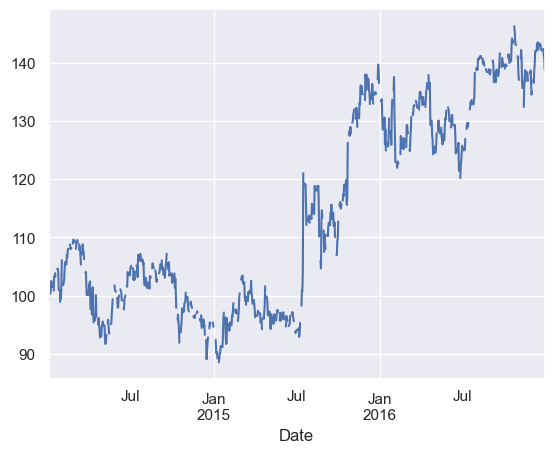

In [89]:
normalized.plot()

In [96]:
prices = pd.read_csv('../data/stock_data/stock_data.csv', parse_dates=['Date'], index_col='Date')[['AAPL', 'AMZN', 'TEF']]
prices

,AAPL,AMZN,TEF
Date,,,
2010-01-04,30.57,133.90,28.55
2010-01-05,30.63,134.69,28.53
2010-01-06,30.14,132.25,28.23
2010-01-07,30.08,130.00,27.75
2010-01-08,30.28,133.52,27.57
...,...,...,...
2016-12-23,116.52,760.59,9.17
2016-12-27,117.26,771.40,9.13
2016-12-28,116.76,772.13,9.03


<Axes: xlabel='Date'>

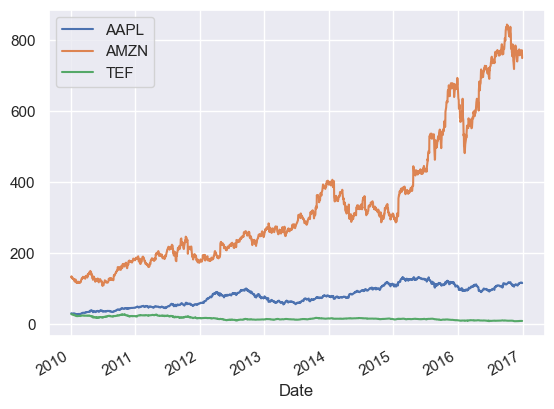

In [97]:
prices.plot()

In [98]:
prices = prices.div(prices.iloc[0])

<Axes: xlabel='Date'>

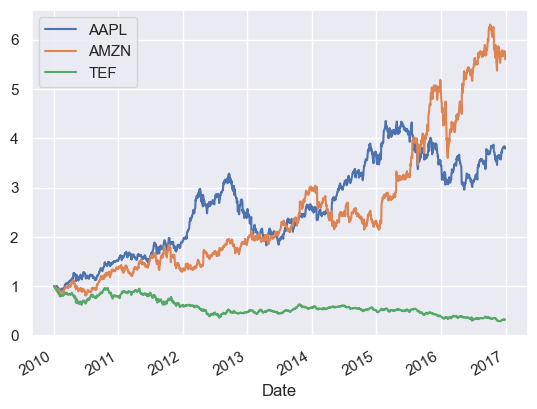

In [99]:
prices.plot()

In [102]:
sp500 = pd.read_csv('../data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [103]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMZN    1761 non-null   float64
 2   TEF     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB


In [105]:
sp500 = sp500.loc['2010-01-04':'2016-12-30']

In [106]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [108]:
prices = pd.concat([prices, sp500], axis=1)

In [109]:
prices

,AAPL,AMZN,TEF,SP500
2010-01-04,1.000000,1.000000,1.000000,1132.99
2010-01-05,1.001963,1.005900,0.999299,1136.52
2010-01-06,0.985934,0.987677,0.988792,1137.14
2010-01-07,0.983971,0.970874,0.971979,1141.69
2010-01-08,0.990514,0.997162,0.965674,1144.98
...,...,...,...,...
2016-12-23,3.811580,5.680284,0.321191,2263.79
2016-12-27,3.835787,5.761016,0.319790,2268.88
2016-12-28,3.819431,5.766468,0.316287,2249.92
2016-12-29,3.818449,5.714339,0.319790,2249.26


In [114]:
prices.isna().sum()

AAPL     0
AMZN     0
TEF      0
SP500    0
dtype: int64

In [115]:
prices = prices.dropna()

In [117]:
prices.isna().sum()

AAPL     0
AMZN     0
TEF      0
SP500    0
dtype: int64

In [118]:
prices['SP500'] = prices['SP500'].div(prices['SP500'].iloc[0])

In [119]:
prices

,AAPL,AMZN,TEF,SP500
2010-01-04,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001963,1.005900,0.999299,1.003116
2010-01-06,0.985934,0.987677,0.988792,1.003663
2010-01-07,0.983971,0.970874,0.971979,1.007679
2010-01-08,0.990514,0.997162,0.965674,1.010583
...,...,...,...,...
2016-12-23,3.811580,5.680284,0.321191,1.998067
2016-12-27,3.835787,5.761016,0.319790,2.002560
2016-12-28,3.819431,5.766468,0.316287,1.985825
2016-12-29,3.818449,5.714339,0.319790,1.985243


<Axes: >

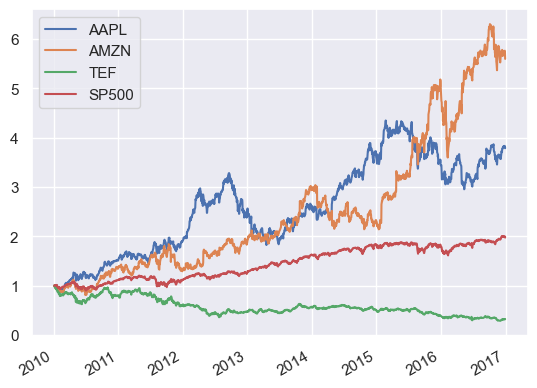

In [120]:
prices.plot()

## Resampling

When we change the frequency of a dataset it affects the data itself too.

When upsampling you have to tell pandas how to fill the new created datapoints (fill or interpolate)

When downsampling you have to specify how to aggregate the values too.

In [122]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: ME, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_36388/444117596.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dates = pd.date_range(start=start, end=end, freq='M')


            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


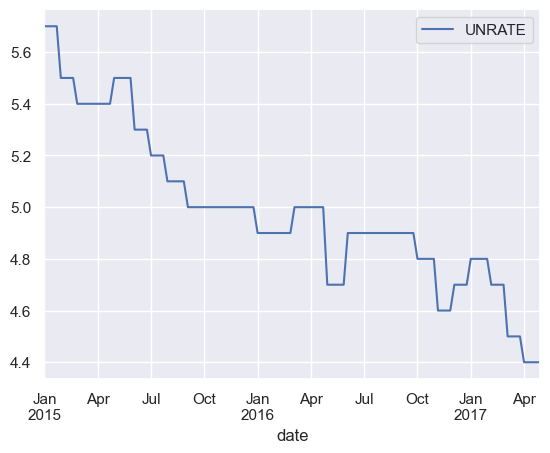

In [124]:
# Import data here
data = pd.read_csv('../data/stock_data/unrate_2000.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


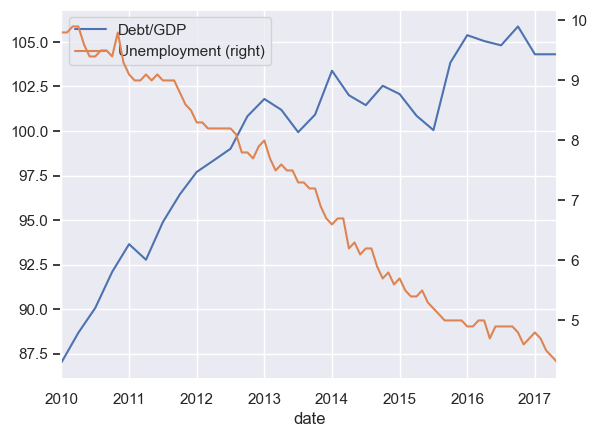

In [126]:
# Import & inspect data here
data = pd.read_csv('../data/stock_data/debt_unemployment.csv', parse_dates = ['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

# Downsampling and aggregation methods

Downsampling its about reducing the frequency: daily to monthly, hourly to daily...

Mean? Median? Last value? 



In [127]:
ozone = pd.read_csv('../data/air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754
...,...
2017-03-27,0.005640
2017-03-28,0.013870
2017-03-29,0.034341


In [129]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [130]:
ozone.asfreq('D')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 227.3 KB


In [131]:
# convert to monthly 
ozone.resample('M').mean().head()

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_36388/3762740725.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ozone.resample('M').mean().head()


,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [132]:
#we can aggregate in different manners at once too 
ozone.resample('M').agg(['mean', 'std']).head()

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_36388/3945916207.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ozone.resample('M').agg(['mean', 'std']).head()


Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_36388/1376769492.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ozone.resample('M').mean()


<Axes: xlabel='date'>

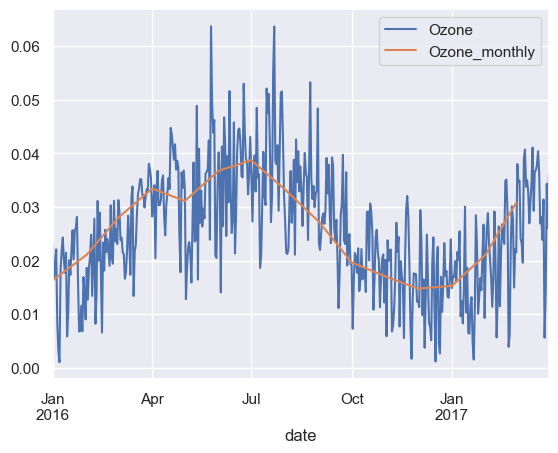

In [133]:
ozone = ozone.loc['2016':]
ax=ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

# Window Functions

Windows specify sub periods of your time series

Calculate metrics for sub periods inside the window

Create a new time series of metrics

There are two main window types: 
- Rolling
- Expanding

## Rolling Windows

<Axes: xlabel='Date'>

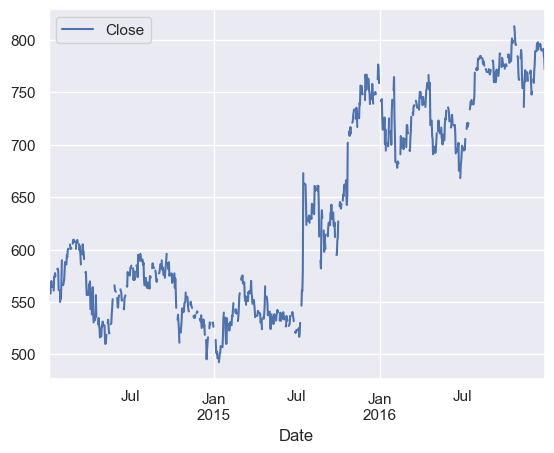

In [135]:
google = pd.read_csv('../data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')
ax = google.plot()

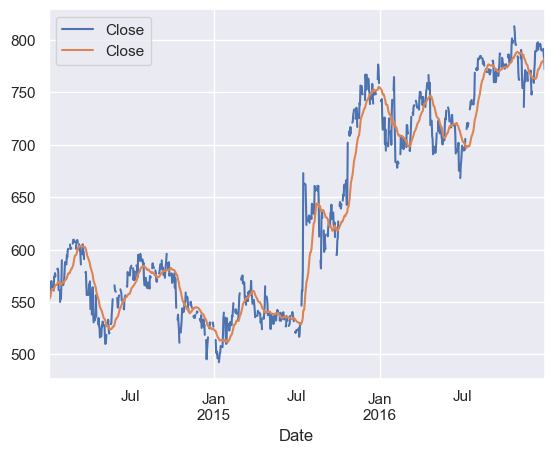

In [141]:
ax = google.plot()
google.rolling(window='30D').mean().plot(ax=ax)
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

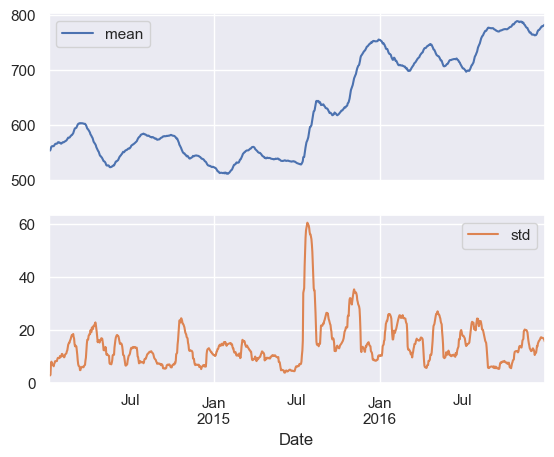

In [143]:
r = google.Close.rolling('30D').agg(['mean', 'std'])
r.plot(subplots=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


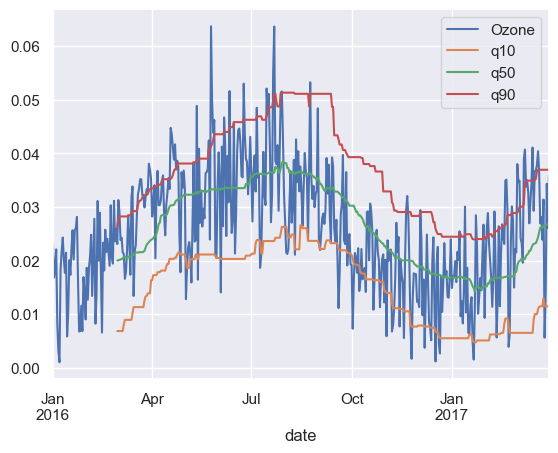

In [146]:
# Resample, interpolate and inspect ozone data here
ozone = ozone.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = ozone.Ozone.rolling(60)

# Insert the rolling quantiles to the monthly returns
ozone['q10'] = rolling.quantile(0.1)
ozone['q50'] = rolling.quantile(0.5)
ozone['q90'] = rolling.quantile(0.9)

# Plot the data
ozone.plot()
plt.show()

## Expanding Windows

Calculate metrics for periods up to current date

New time series reflects all historical values

Two options in pandas
- *.expanding()* (like rolling)
- *.cumsum()*, *.cumprod()*, *.cummin()*, *.cummax()*


In [149]:
df = pd.DataFrame({'data': range(5)})
df['expanding sum']=df.data.expanding().sum() 
df['cumulative sum']=df.data.cumsum() 

df

,data,expanding sum,cumulative sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [152]:
google = pd.read_csv('../data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')
google['running min'] = google.Close.expanding().min() 
google['running max'] = google.Close.expanding().max() 

<Axes: xlabel='Date'>

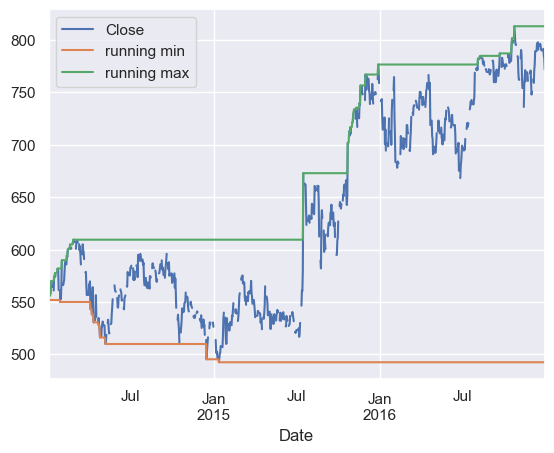

In [153]:
google.plot()